In [1]:
import pandas as pd
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

In [2]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

In [4]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
Ravdess = "ravdess_datasets\\"

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  ravdess_datasets\Actor_01/03-01-01-01-01-01-01...
1  neutral  ravdess_datasets\Actor_01/03-01-01-01-01-02-01...
2  neutral  ravdess_datasets\Actor_01/03-01-01-01-02-01-01...
3  neutral  ravdess_datasets\Actor_01/03-01-01-01-02-02-01...
4     calm  ravdess_datasets\Actor_01/03-01-02-01-01-01-01...

In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  ravdess_datasets\Actor_01/03-01-01-01-01-01-01...
1  neutral  ravdess_datasets\Actor_01/03-01-01-01-01-02-01...
2  neutral  ravdess_datasets\Actor_01/03-01-01-01-02-01-01...
3  neutral  ravdess_datasets\Actor_01/03-01-01-01-02-02-01...
4     calm  ravdess_datasets\Actor_01/03-01-02-01-01-01-01...

In [ ]:
plt.title('Count of Emotions', size=16)
sns.barplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [15]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

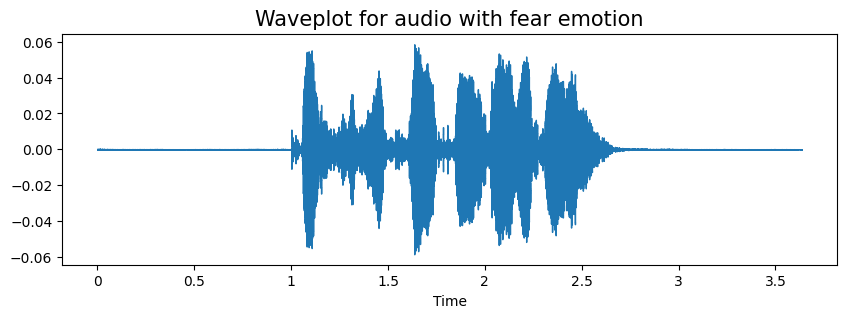

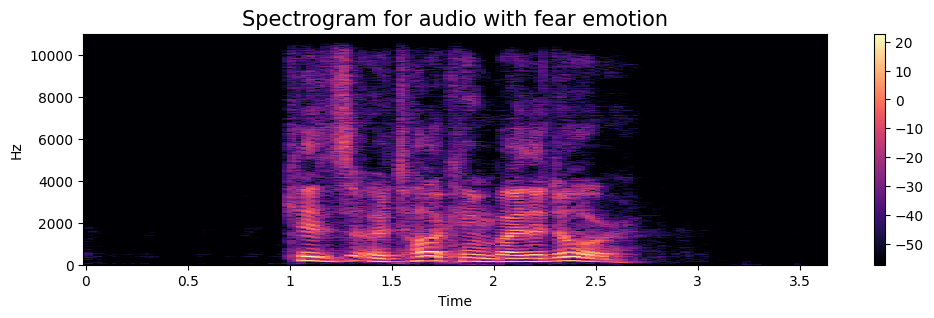

In [16]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

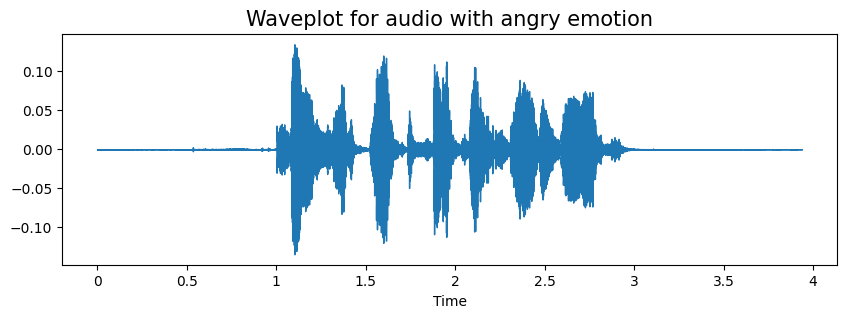

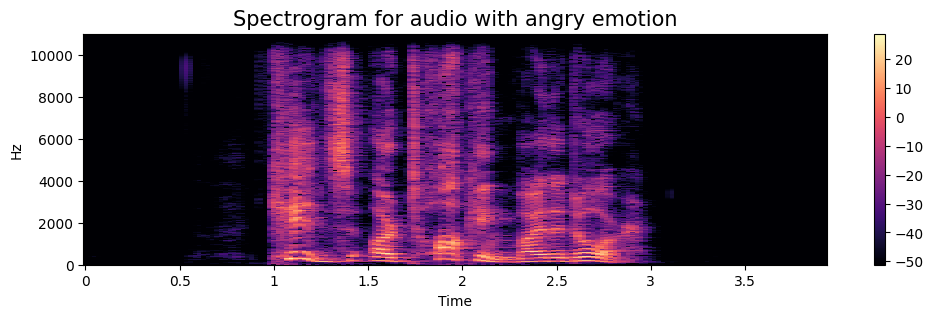

In [17]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

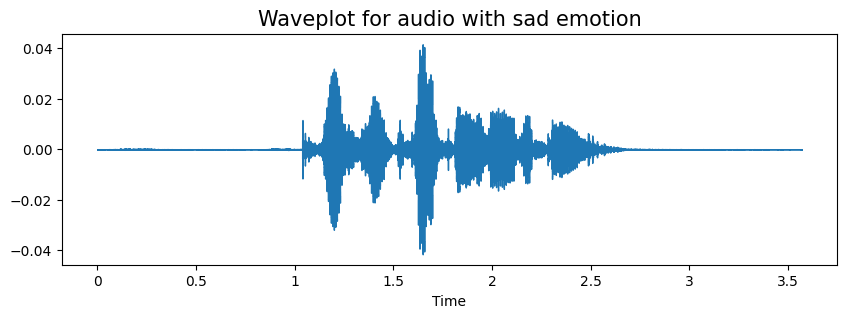

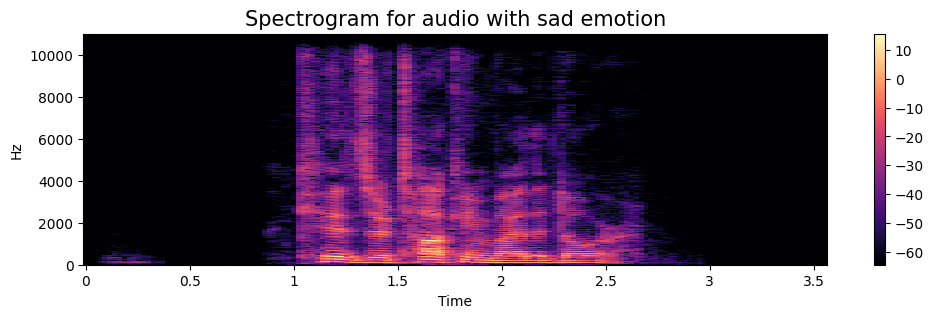

In [18]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

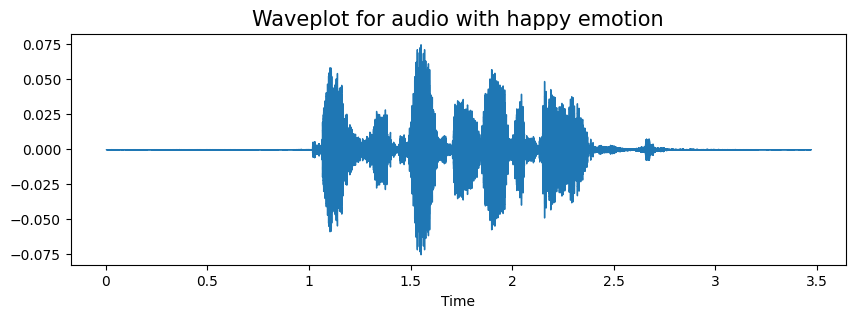

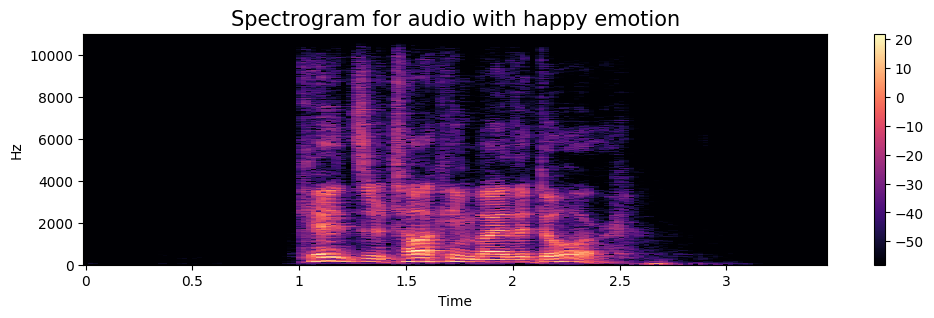

In [19]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

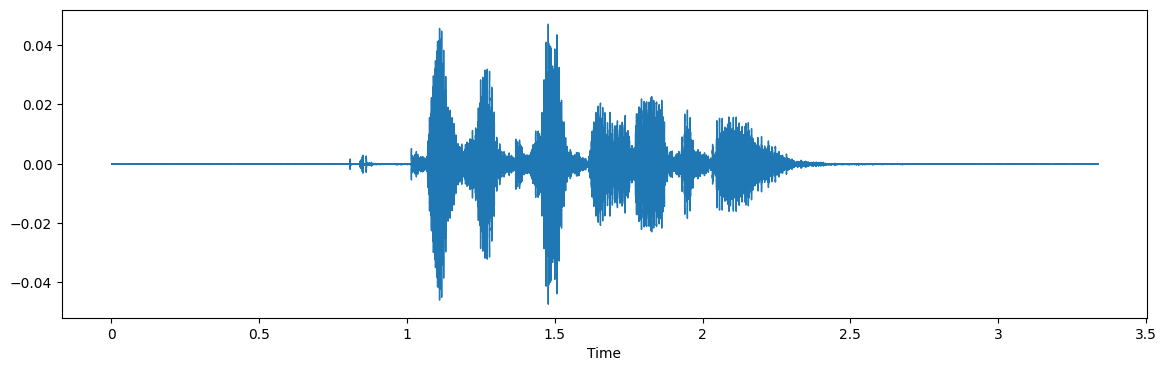

In [21]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)


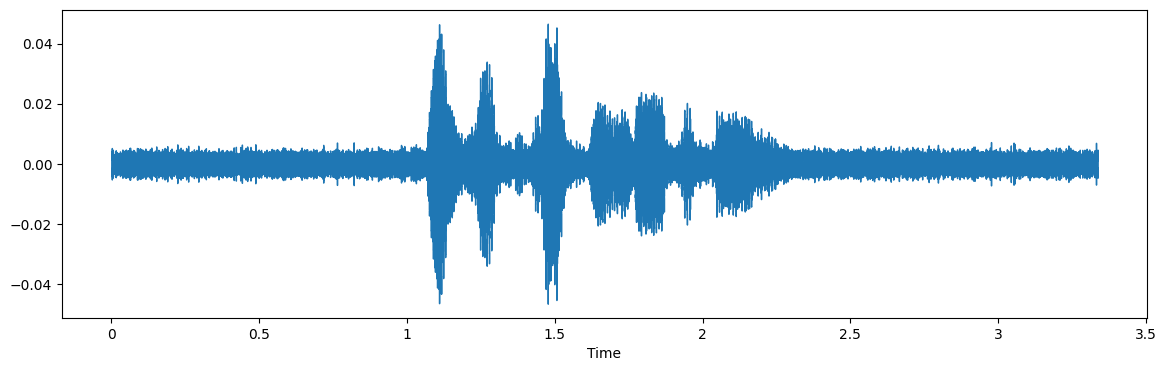

In [22]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

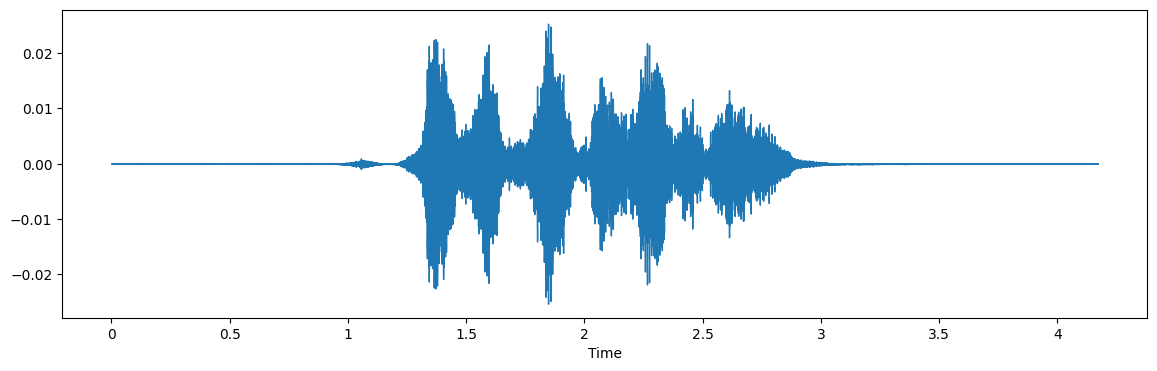

In [23]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

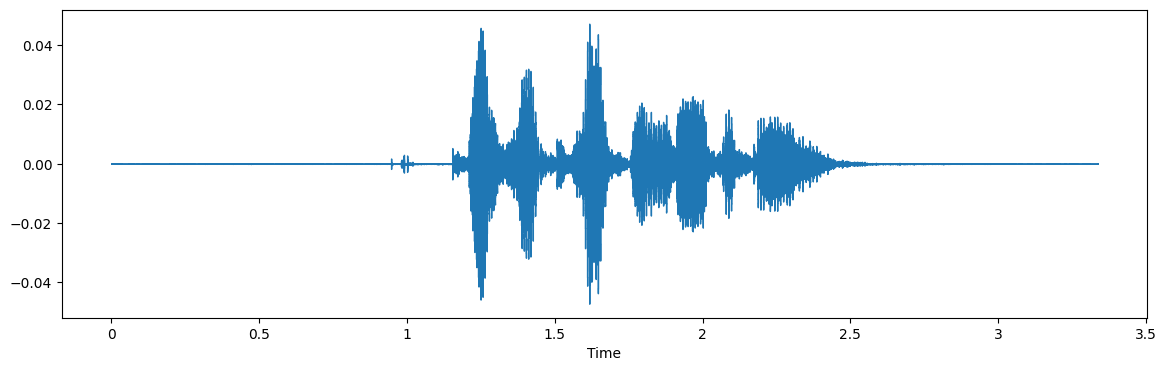

In [24]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

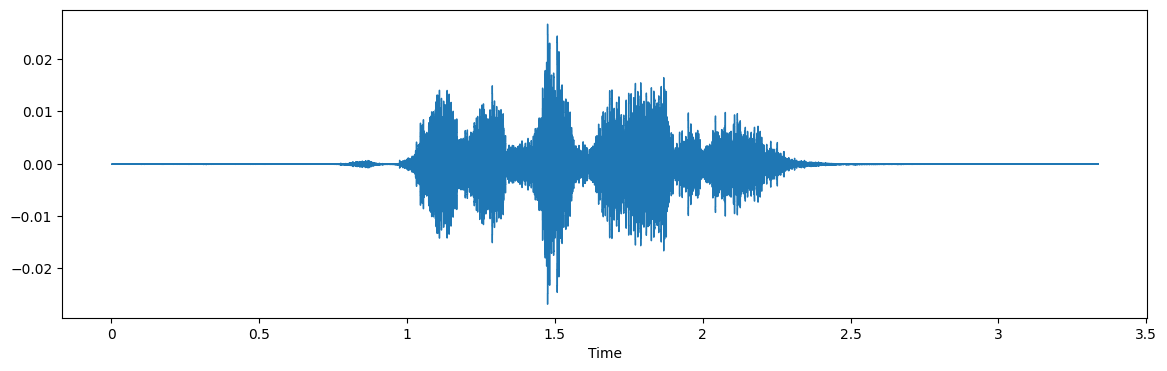

In [25]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [26]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [27]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [28]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [29]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.209335  0.667705  0.723171  0.744171  0.691919  0.591356  0.649161   
1  0.245850  0.663534  0.698828  0.771295  0.733775  0.696847  0.629523   
2  0.167407  0.602868  0.648012  0.765338  0.725364  0.667427  0.524797   
3  0.225174  0.574263  0.630442  0.700850  0.702183  0.613436  0.555546   
4  0.266342  0.594666  0.660430  0.726708  0.770624  0.713378  0.651347   

          7         8         9  ...       153       154       155       156  \
0  0.680914  0.587151  0.568892  ...  0.000114  0.000160  0.000215  0.000180   
1  0.713127  0.659364  0.599142  ...  0.000114  0.000158  0.000215  0.000181   
2  0.673189  0.730260  0.596364  ...  0.000024  0.000020  0.000033  0.000038   
3  0.615150  0.651923  0.541747  ...  0.000095  0.000153  0.000118  0.000170   
4  0.688771  0.711173  0.616132  ...  0.000122  0.000172  0.000143  0.000190   

        157       158       159           160           161   labels  
0  0.000248  0.000044  0.000008  3.248136e-07  1.567397e-09  neutral  
1  0.000248  0.000045  0.000008  9.474111e-07  6.423838e-07  neutral  
2  0.000061  0.000027  0.000010  1.928940e-07  7.158587e-10  neutral  
3  0.000214  0.000114  0.000022  8.101229e-07  3.057758e-09  neutral  
4  0.000233  0.000134  0.000044  2.024342e-05  2.022440e-05  neutral  

[5 rows x 163 columns]

In [30]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [32]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

In [33]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(x_train.shape[1],1))) 
model.add(Activation('relu'))

model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1])) # Target class number
model.add(Activation('softmax'))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 162, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 162, 256)          524544    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 162, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 162, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 162, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 256)           0

In [34]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
51/51 [==============================] - 35s 629ms/step - loss: 1.9110 - accuracy: 0.2392 - val_loss: 2.0042 - val_accuracy: 0.2009
Epoch 2/100
51/51 [==============================] - 31s 608ms/step - loss: 1.7245 - accuracy: 0.3225 - val_loss: 1.9838 - val_accuracy: 0.2472
Epoch 3/100
51/51 [==============================] - 31s 600ms/step - loss: 1.6480 - accuracy: 0.3568 - val_loss: 1.9116 - val_accuracy: 0.2528
Epoch 4/100
51/51 [==============================] - 31s 604ms/step - loss: 1.5458 - accuracy: 0.3985 - val_loss: 2.1802 - val_accuracy: 0.2231
Epoch 5/100
51/51 [==============================] - 31s 615ms/step - loss: 1.4899 - accuracy: 0.4293 - val_loss: 1.7726 - val_accuracy: 0.3130
Epoch 6/100
51/51 [==============================] - 31s 616ms/step - loss: 1.4405 - accuracy: 0.4389 - val_loss: 1.4824 - val_accuracy: 0.4509
Epoch 7/100
51/51 [==============================] - 30s 588ms/step - loss: 1.3750 - accuracy: 0.4698 - val_loss: 1.6222 - val_accuracy:

51/51 [==============================] - 25s 483ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.8939 - val_accuracy: 0.7593
Epoch 58/100
51/51 [==============================] - 25s 495ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.9737 - val_accuracy: 0.7463
Epoch 59/100
51/51 [==============================] - 26s 504ms/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.8942 - val_accuracy: 0.7611
Epoch 60/100
51/51 [==============================] - 25s 495ms/step - loss: 0.0172 - accuracy: 0.9954 - val_loss: 0.9009 - val_accuracy: 0.7778
Epoch 61/100
51/51 [==============================] - 26s 513ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.9145 - val_accuracy: 0.7685
Epoch 62/100
51/51 [==============================] - 27s 527ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.9031 - val_accuracy: 0.7667
Epoch 63/100
51/51 [==============================] - 27s 522ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 0.9147 - val_accuracy: 0.758

34/34 [==============================] - 1s 38ms/step - loss: 0.9135 - accuracy: 0.7648
Accuracy of our model on test data :  76.48147940635681 %


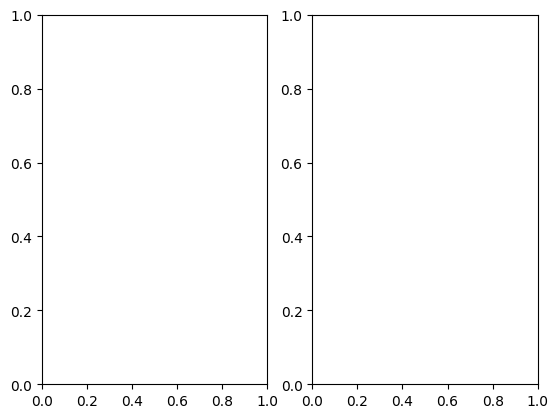

In [36]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# fig.set_size_inches(20,6)
# ax[0].plot(epochs , train_loss , label = 'Training Loss')
# ax[0].plot(epochs , test_loss , label = 'Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")

# ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
# ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()

In [37]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [39]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             fear          fear
1            angry         angry
2             fear          fear
3          neutral          calm
4            angry         angry
5         surprise      surprise
6             fear          fear
7            happy         happy
8             fear          fear
9              sad           sad

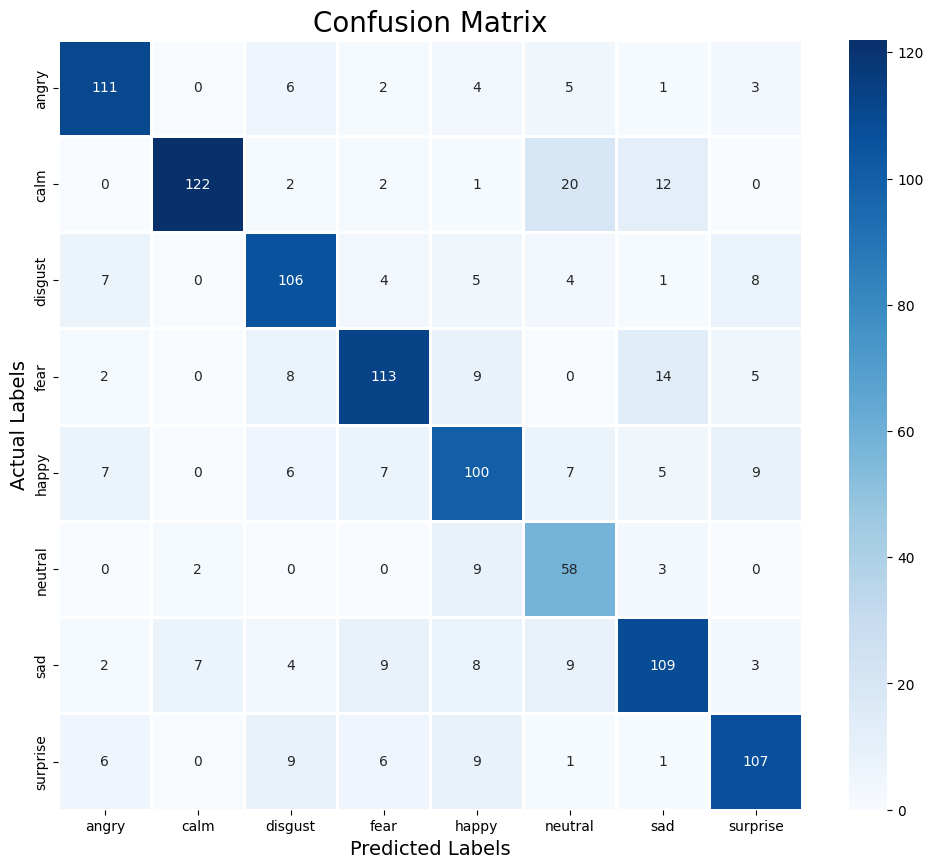

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.82      0.84      0.83       132
        calm       0.93      0.77      0.84       159
     disgust       0.75      0.79      0.77       135
        fear       0.79      0.75      0.77       151
       happy       0.69      0.71      0.70       141
     neutral       0.56      0.81      0.66        72
         sad       0.75      0.72      0.73       151
    surprise       0.79      0.77      0.78       139

    accuracy                           0.76      1080
   macro avg       0.76      0.77      0.76      1080
weighted avg       0.78      0.76      0.77      1080

